In [ ]:
# autoreload magic
%reload_ext autoreload
%autoreload 2


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


from mindreadingautobots.analysis.analysis_config import SPREADSHEET_NAMES, BF_VALS, NAME_TEMPLATES, DATASET_NAMES
from mindreadingautobots.analysis.analysis_config import spreadsheet_to_dataframe
target_directory = "../processed/"

### Extra analysis: We can significantly improve Ham(6, 6) hypers for LSTM.

In [4]:
# Get existing hamiltonian data
bf_vals = BF_VALS[5]
df_ham_original = pd.read_csv(f"{target_directory}{SPREADSHEET_NAMES[5]}.csv")
df_ham_ana = pd.read_csv(f"{target_directory}{SPREADSHEET_NAMES[5]}_ana.csv")
entropies = df_ham_ana["entropy"].values.flatten()

bf_vals = [0, 10, 20]
sheetname_template = NAME_TEMPLATES[5]
df_ham_rerun_rnn = spreadsheet_to_dataframe("haniltonian_rerun", bf_vals, sheetname_template, models=["RNN"])

Loading: RNN_hamilton_6_choose_6_nbits11_n5000_bf0_seed1234_results
Loading: RNN_hamilton_6_choose_6_nbits11_n5000_bf10_seed1234_results
Loading: RNN_hamilton_6_choose_6_nbits11_n5000_bf20_seed1234_results


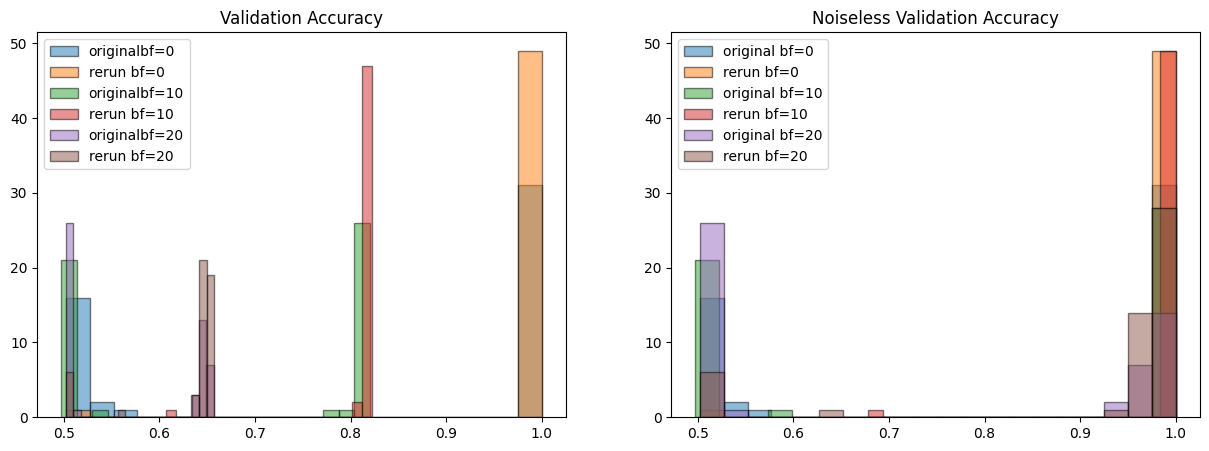

In [10]:
# get the RNN-only results from df_ham_original
df_ham_original_rnn = df_ham_original[df_ham_original["model"] == "RNN"]
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
for bf in bf_vals:
    axes[0].hist(df_ham_original_rnn[df_ham_original_rnn["bf"] == bf]["val_acc"], bins=20, edgecolor="black", alpha=0.5, label=f"originalbf={bf}")
    axes[0].hist(df_ham_rerun_rnn[df_ham_rerun_rnn["bf"] == bf]["val_acc"], bins=20, edgecolor="black", alpha=0.5, label=f"rerun bf={bf}")
axes[0].set_title("Validation Accuracy")
for bf in bf_vals:
    axes[1].hist(df_ham_original_rnn[df_ham_original_rnn["bf"] == bf]["noiseless_val_acc"], bins=20, edgecolor="black", alpha=0.5, label=f"original bf={bf}")
    axes[1].hist(df_ham_rerun_rnn[df_ham_rerun_rnn["bf"] == bf]["noiseless_val_acc"], bins=20, edgecolor="black", alpha=0.5, label=f"rerun bf={bf}")
axes[1].set_title("Noiseless Validation Accuracy")
for ax in axes:
    ax.legend()
plt.show()